In [ ]:
import numpy as np
import pandas as pd

# Data Wragling

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
dfnew = pd.read_csv('drive/My Drive/MSIB5-DataSience/Dataset/train.csv')
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Check and Handling Missing Value

### Missing value Numbering

In [ ]:
# untuk check missing value di data numeric
dfnew.select_dtypes(include=['int', 'float']).isna().sum().sort_values(ascending = False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
Id                 0
OpenPorchSF        0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
EnclosedPorch      0
HalfBath           0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
BedroomAbvGr       0
FullBath           0
MSSubClass         0
BsmtFinSF2         0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtUnfSF          0
BsmtHalfBath       0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
SalePrice          0
dtype: int64

   
**dari hasil analisa saya tottal tanah dan total keseluruhan luas bangunan masih banyak menyisakan tanah kosong. Jadi data yang kolom LotFrontage memiliki nilai NAN,<br>
bisa jadi karena memang kehilangan datanaya. dan harusnya semua data memiliki LotFrontage<br>
dengan alasan ini saya mengganti nilai missing value menggunakan nilai median<br>**

In [ ]:
#mengganti missing ke nilai median
median_LotFrontage = dfnew['LotFrontage'].median()
dfnew['LotFrontage'].fillna(median_LotFrontage, inplace=True)

**Dari hasil analisa diatas bawasannya data yang memiliki niulai NaN pada kolom GarageYrBlt, terjadi karena pada data tersebut benar-benar tidak memiliki garasi. <br>
Jadi oleh karena itu saya handling dengan cara mengganti nilai NaN menjadi 0**

In [ ]:
#mengganti missing ke nilai 0
dfnew['GarageYrBlt'].fillna(0, inplace=True)

Dari Hasil Analysa diatas menelaskan bahwa data yang memiliki nilai NaN pada kolom MasVnrArea, terjadi karena permukaan dinding memang tidak dilapisi pelindung

In [ ]:
#mengganti missing ke nilai 0
dfnew['MasVnrArea'].fillna(0, inplace=True)

**Dari hasil analisa diaats bawasannya data yang memiliki nilai Nan Pada kolom PoolQC terjadi karena, memang data tersebut tidak memiliki kolam renang.
Jadi untuk menjaga data yang mempunyai kolam renang dan kualitasnya saya hadlling dengan mengganti nailai NaN menjadi "NotHavePoll"**

In [ ]:
#mengganti NaN menjadi 'NothavePool'
dfnew['PoolQC'].fillna("NotPool", inplace=True)

MiscFeature adalah kolom yang menjelaskan fitur tambahan yang terdapat pada rumah/propreti.<br>
Jadi menurut analaisa saya kolom ini sangat mempengaruhi harga jual rumah.. oleh karena itu untuk menjaga data yang memiliki fitur tambahan<br>
saya handling dengan cara mengganri missing value dengan NFeatureAdd

In [ ]:
dfnew['MiscFeature'].fillna("NFeatureAdd", inplace=True)

kolom Allay adalah kolom yang menjelaskan tentang jenis jalan gang..menurut pandangan saya banyak rumah atau properti yang tidak masuk ke jalan gang<br>
oleh karena itu handling dengan cara mengganti NaN Value menjadi "NAllay"

In [ ]:
dfnew['Alley'].fillna("NAllay", inplace=True)

Fence merupakan kolom yang memebrikan informasi jenis pagar yang di gunakan pada setiap rumah/ properti
dalam kasu dunia nyata banyak rumah/properti tidak memiliki pagar. oleh karena itu untuk handling dengan mengganti nilai NaN menjadi NFence

In [ ]:
dfnew['Fence'].fillna("NFence", inplace=True)

Dari Hasil Analysa diatas menelaskan bahwa data yang memiliki nilai NaN pada kolom MasVnrType, terjadi karena permukaan dinding memang tidak dilapisi pelindung

In [ ]:
dfnew['MasVnrType'].fillna("NVnr", inplace=True)

dari hasil analisa diatas data yang memilkim nilai NaN pada kolom FireplaceQu terjadi kerena bawasannya dalm rumah atau propreti tidak memiliki Fireplaces. untuk menjaga data rumah yang memiliki Fireplaces saya handling dengan cara mengganti NaN menjadi "NFireplace"

In [ ]:
dfnew['FireplaceQu'].fillna("NFireplace", inplace=True)

Dari hasil analisa diatas bawasanya data yang mimiliki nilai NaN pada kolom GarageType ,GarageCond ,GarageQual dan GarageFinish
terjadi karena tidak memilki Garasi. Oleh karena itu untuk menjaga kerasionalan data dan data properi yang memilki garasi, handling dengan cara mengganti Nilai Nan dengan "NGarage'

In [ ]:
dfnew['GarageType'].fillna("Ngarage", inplace=True)
dfnew['GarageCond'].fillna("Ngarage", inplace=True)
dfnew['GarageQual'].fillna("Ngarage", inplace=True)
dfnew['GarageFinish'].fillna("Ngarage", inplace=True)

Dari analisa diatas bawasannya kolom-kolom diatas yang memilki nilai NaN terjadi karena bawasannya rumah/proprerti tersebut tidak memiliki basemant
Oleh Kerana itu handling dengan cara mengganti nilai NaN menjadi NBsmt

In [ ]:
dfnew['BsmtFinType2'].fillna("NBsmt", inplace=True)
dfnew['BsmtExposure'].fillna("NBsmt", inplace=True)
dfnew['BsmtFinType1'].fillna("NBsmt", inplace=True)
dfnew['BsmtQual'].fillna("NBsmt", inplace=True)
dfnew['BsmtCond'].fillna("NBsmt", inplace=True)

Dalam analisa saya kolom ini menelaskan tentang jenis layanan listrik yang digunkan...dalam zaman sekarang semua rumah pasti memiliki listrik.
Misiing value ini mungkin terjadi karena datanay hilang..Oleh karena itu hadlingnya dengan mengisi nilai NaN Menjadi nilai modus dari kolom tersebut

In [ ]:
modusElec = dfnew['Electrical'].mode()
dfnew['Electrical'].fillna("modusElec", inplace=True)

In [ ]:
#check
dfnew.isna().sum().sort_values(ascending = False)

Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 81, dtype: int64

## Duplicated Data

In [ ]:
 dfnew[dfnew.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


## CASETING DATA

In [ ]:
dfnew['MSSubClass'] = dfnew['MSSubClass'].astype('category')
dfnew['MSZoning'] = dfnew['MSZoning'].astype('category')
dfnew['Street'] = dfnew['Street'].astype('category')
dfnew['Alley'] = dfnew['Alley'].astype('category')
dfnew['LandContour'] = dfnew['LandContour'].astype('category')
dfnew['Utilities'] = dfnew['Utilities'].astype('category')
dfnew['LotConfig'] = dfnew['LotConfig'].astype('category')
dfnew['LandSlope'] = dfnew['LandSlope'].astype('category')
dfnew['Neighborhood'] = dfnew['Neighborhood'].astype('category')
dfnew['Condition1'] = dfnew['Condition1'].astype('category')
dfnew['Condition2'] = dfnew['Condition2'].astype('category')
dfnew['BldgType'] = dfnew['BldgType'].astype('category')
dfnew['HouseStyle'] = dfnew['HouseStyle'].astype('category')
dfnew['RoofStyle'] = dfnew['RoofStyle'].astype('category')
dfnew['RoofMatl'] = dfnew['RoofMatl'].astype('category')
dfnew['Exterior1st'] = dfnew['Exterior1st'].astype('category')
dfnew['Exterior2nd'] = dfnew['Exterior2nd'].astype('category')
dfnew['MasVnrType'] = dfnew['MasVnrType'].astype('category')
dfnew['ExterQual'] = dfnew['ExterQual'].astype('category')
dfnew['ExterCond'] = dfnew['ExterCond'].astype('category')
dfnew['Foundation'] = dfnew['Foundation'].astype('category')
dfnew['BsmtQual'] = dfnew['BsmtQual'].astype('category')
dfnew[' BsmtCond'] = dfnew['BsmtCond'].astype('category')
dfnew['BsmtExposure'] = dfnew['BsmtExposure'].astype('category')
dfnew['BsmtFinType2'] = dfnew['BsmtFinType2'].astype('category')
dfnew['BsmtFinType1'] = dfnew['BsmtFinType1'].astype('category')
dfnew['Heating'] = dfnew['Heating'].astype('category')
dfnew['HeatingQC'] = dfnew['HeatingQC'].astype('category')
dfnew['CentralAir'] = dfnew['CentralAir'].astype('category')
dfnew['Electrical'] = dfnew['Electrical'].astype('category')
dfnew['KitchenQual'] = dfnew['KitchenQual'].astype('category')
dfnew['Functional'] = dfnew['Functional'].astype('category')
dfnew['FireplaceQu'] = dfnew['FireplaceQu'].astype('category')
dfnew['GarageType'] = dfnew['GarageType'].astype('category')
dfnew['GarageFinish'] = dfnew['GarageFinish'].astype('category')
dfnew['GarageQual'] = dfnew['GarageQual'].astype('category')
dfnew['PoolQC'] = dfnew['PoolQC'].astype('category')
dfnew['Fence'] = dfnew['Fence'].astype('category')
dfnew['MiscFeature'] = dfnew['MiscFeature'].astype('category')
dfnew['SaleType'] = dfnew['SaleType'].astype('category')
dfnew['SaleCondition'] = dfnew['SaleCondition'].astype('category')
dfnew['LotShape'] = dfnew['LotShape'].astype('category')
dfnew['GarageCond'] = dfnew['GarageCond'].astype('category')
dfnew['ExterQual'] = dfnew['ExterQual'].astype('category')
dfnew['BsmtQual'] = dfnew['BsmtQual'].astype('category')
dfnew['FireplaceQu'] = dfnew['FireplaceQu'].astype('category')
dfnew['GarageType'] = dfnew['GarageType'].astype('category')
dfnew['GarageQual'] = dfnew['GarageQual'].astype('category')
dfnew['SaleType'] = dfnew['SaleType'].astype('category')

## Outlier

In [ ]:
#menentukan outlier dengan cara satatistiqal IQR
#Dimana Outlier akan terdeteksi pada saat values Q1–1,5 IQR atau di atas Q3 + 1,5 IQR
def find_outliers_IQR(dfnew):
    Q1 = dfnew.quantile(0.25)
    Q3 = dfnew.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (dfnew < lower_bound) | (dfnew > upper_bound)
    return outliers

# Memilih kolom-kolom numerik dalam DataFrame dfnew
numerical_columns = dfnew.select_dtypes(include=['int', 'float'])
# Mencari outlier dalam kolom-kolom numerik menggunakan IQR
outliers = find_outliers_IQR(numerical_columns)

In [ ]:
outliers

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1458,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False


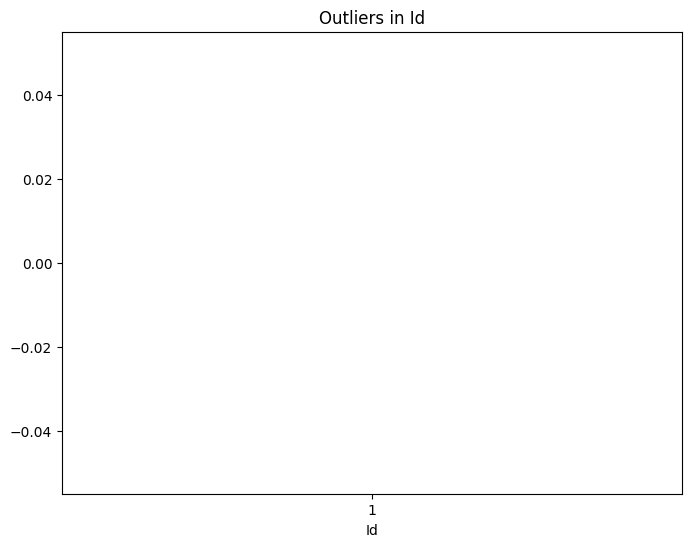

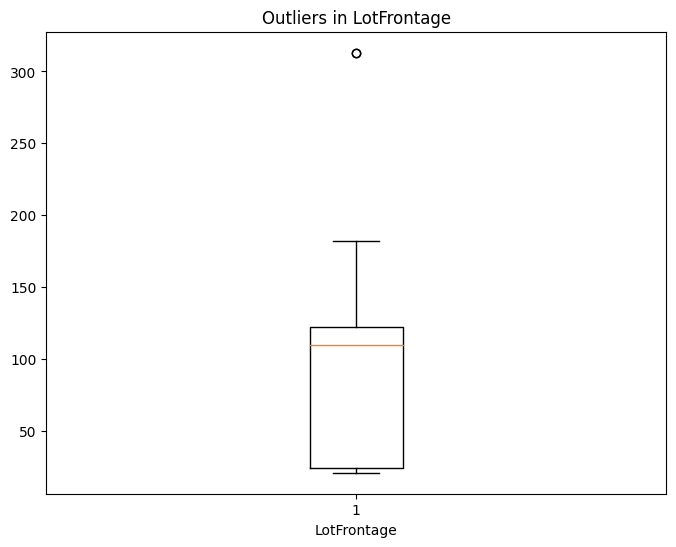

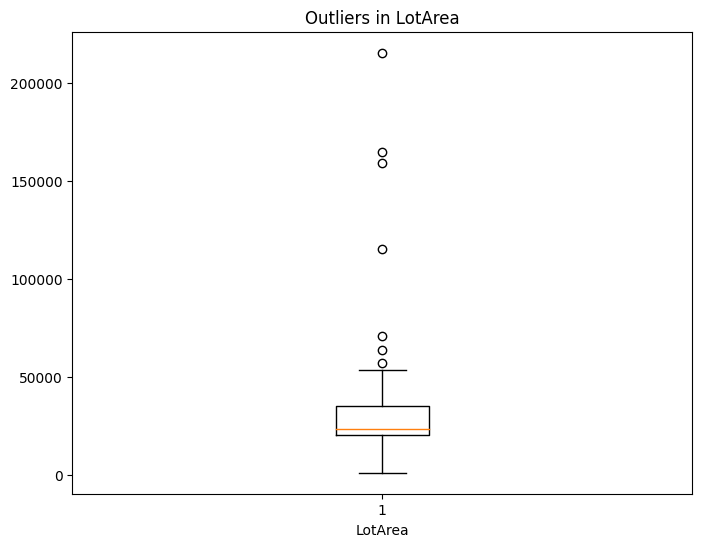

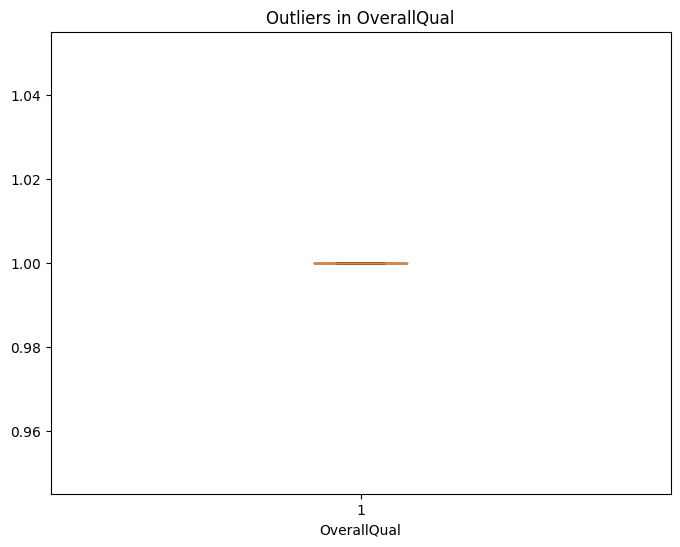

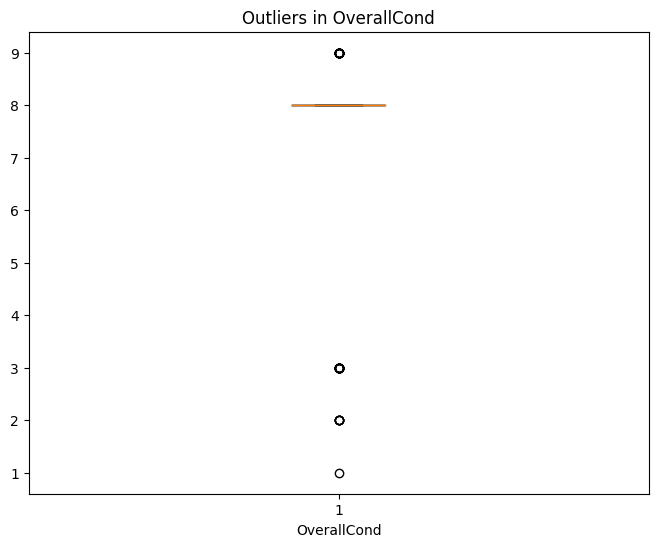

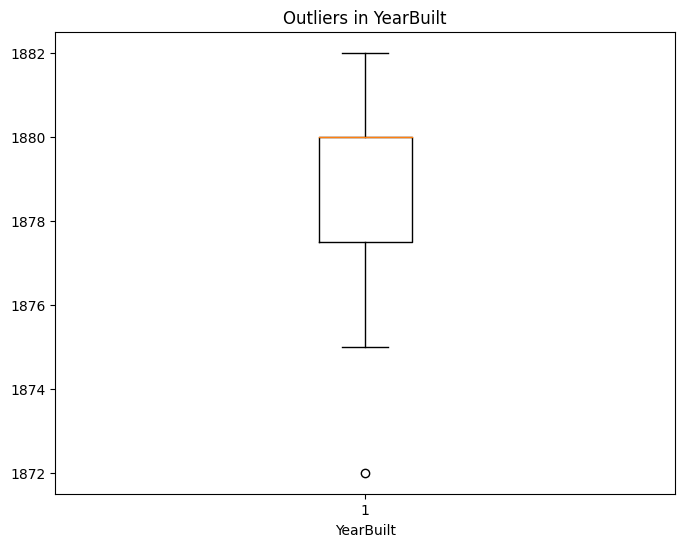

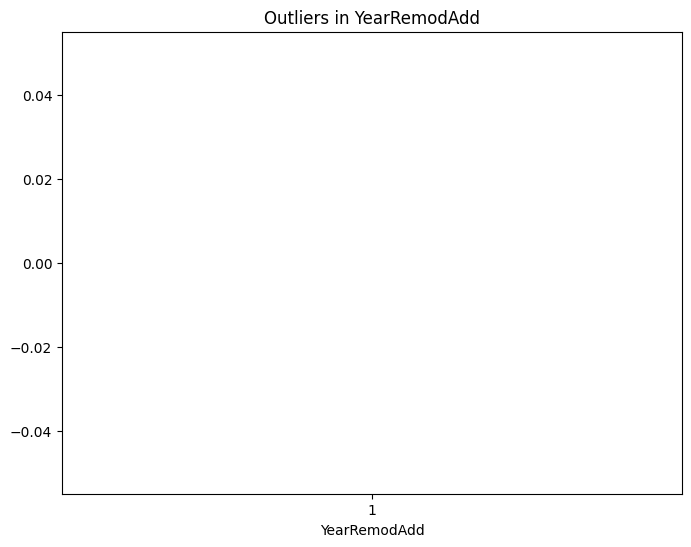

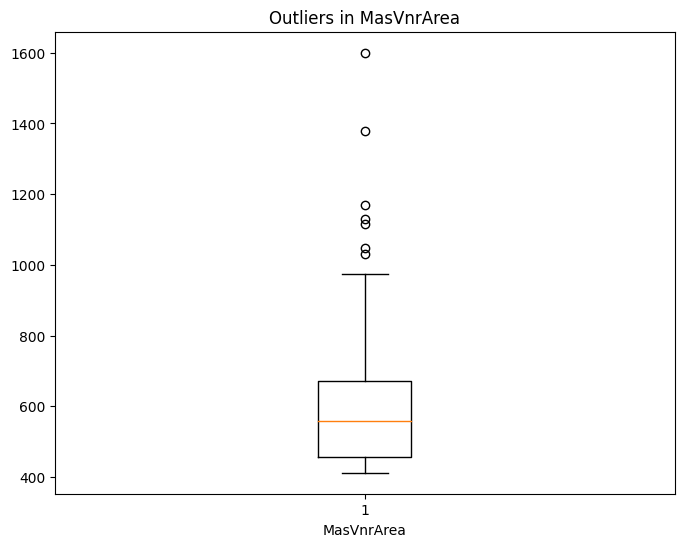

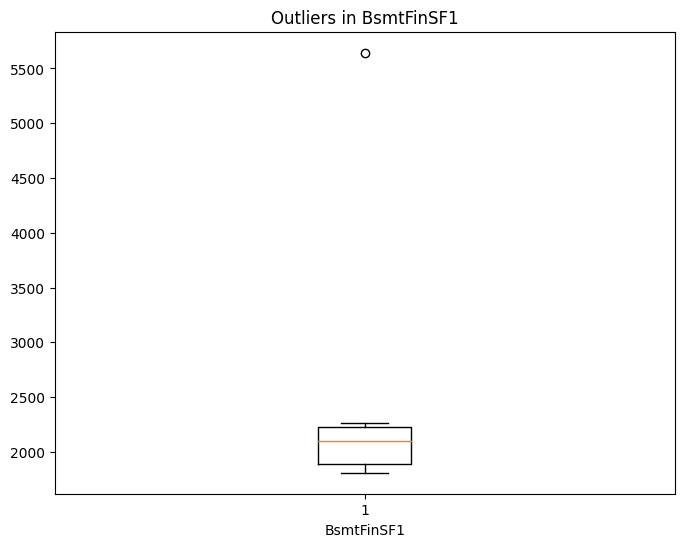

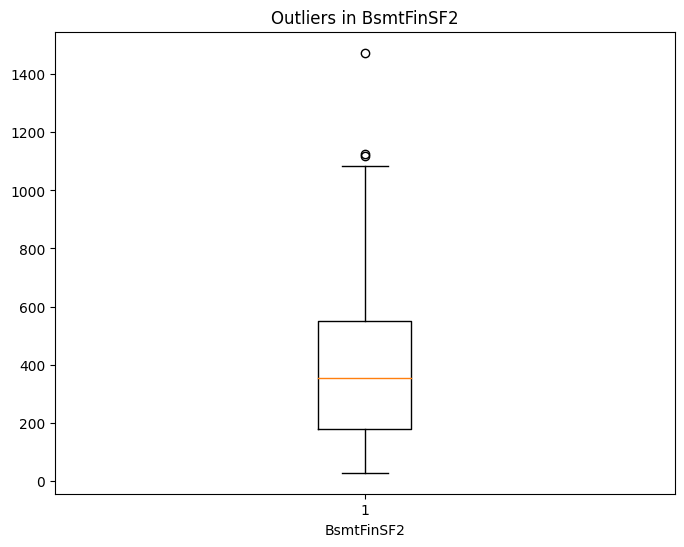

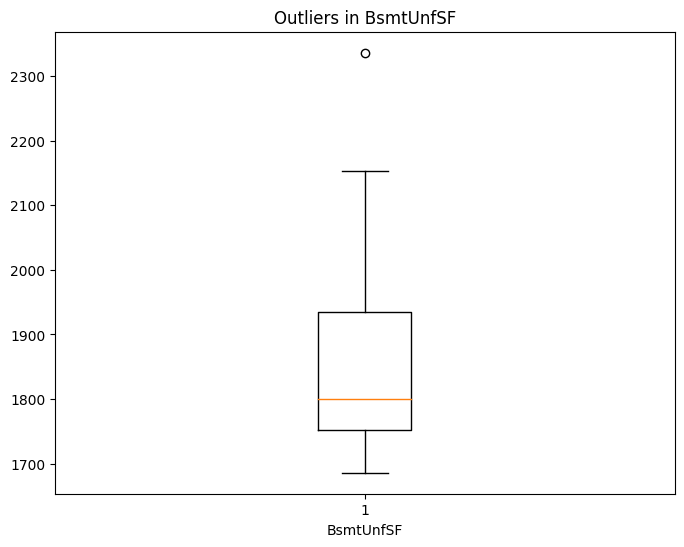

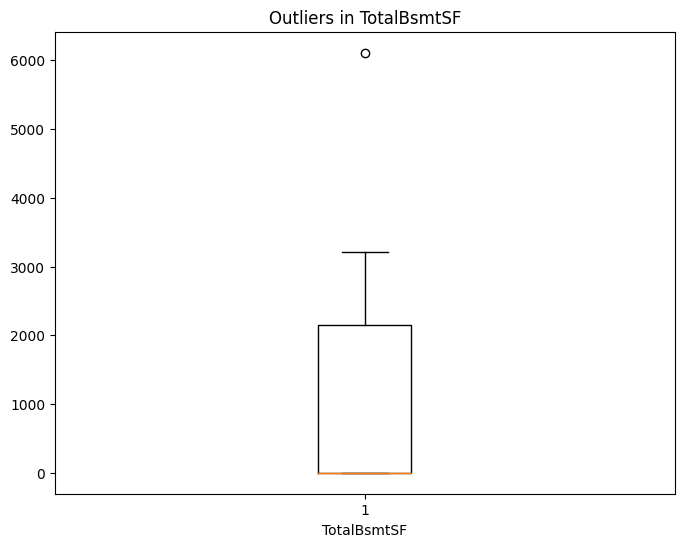

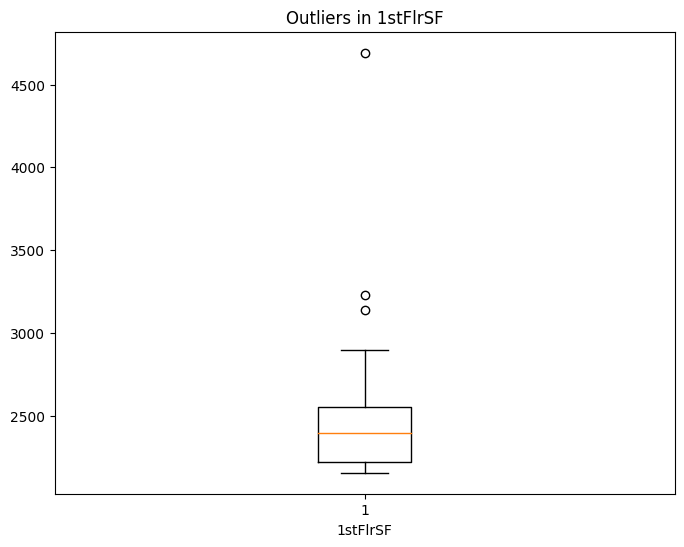

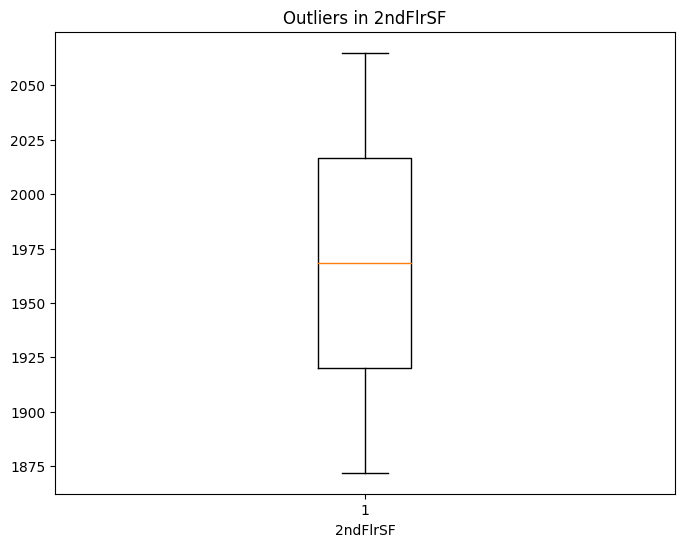

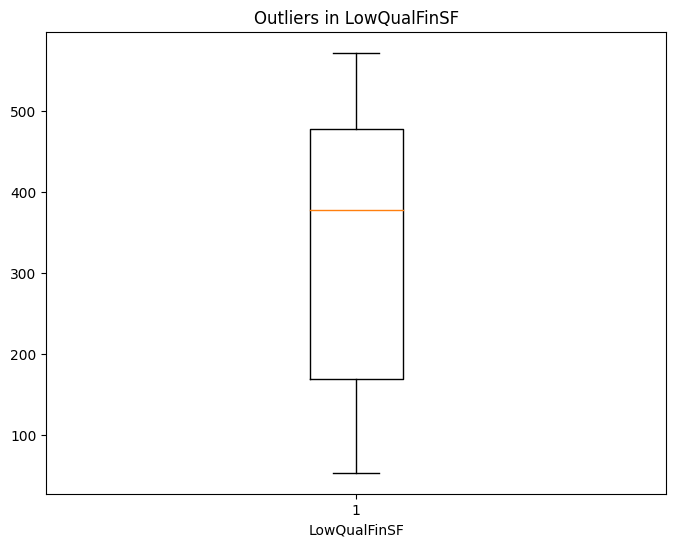

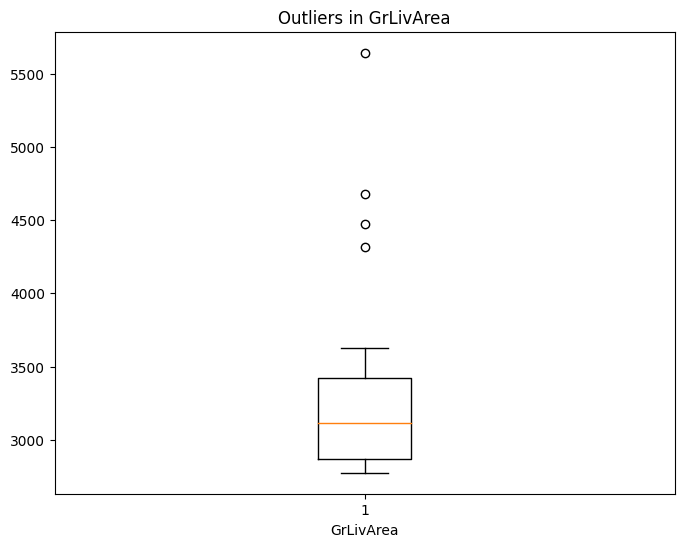

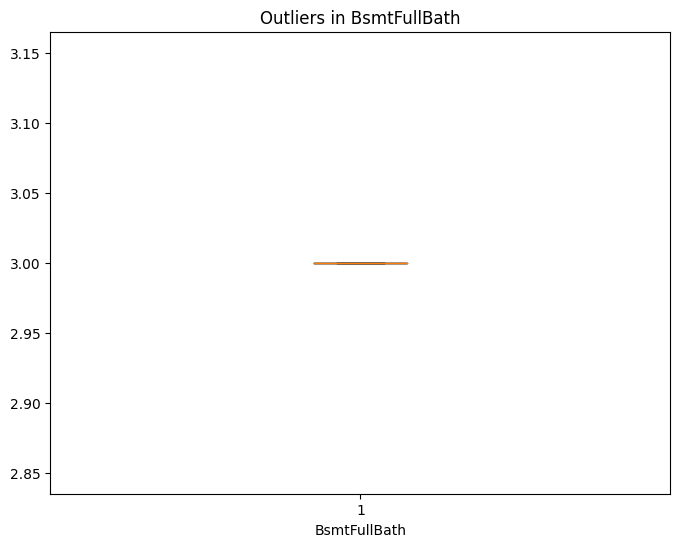

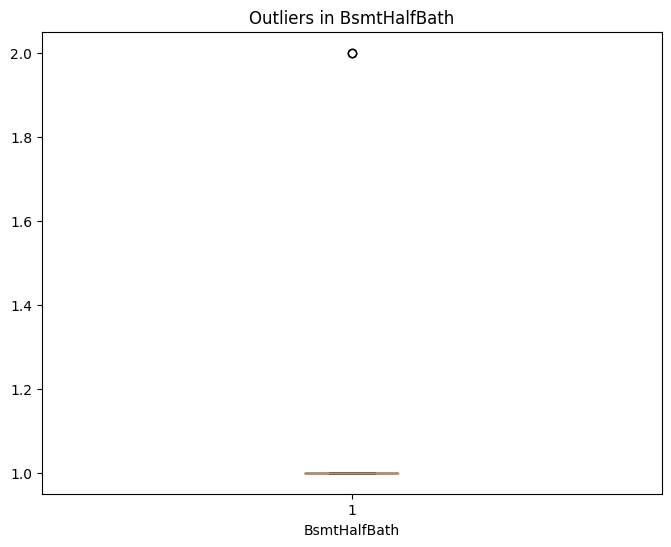

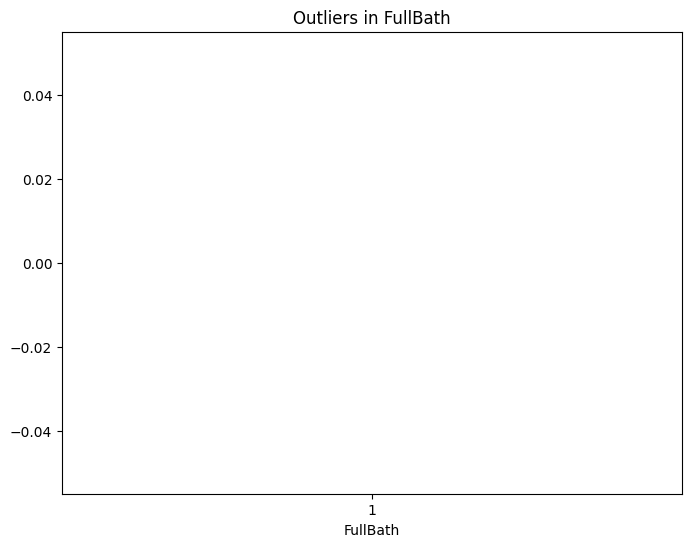

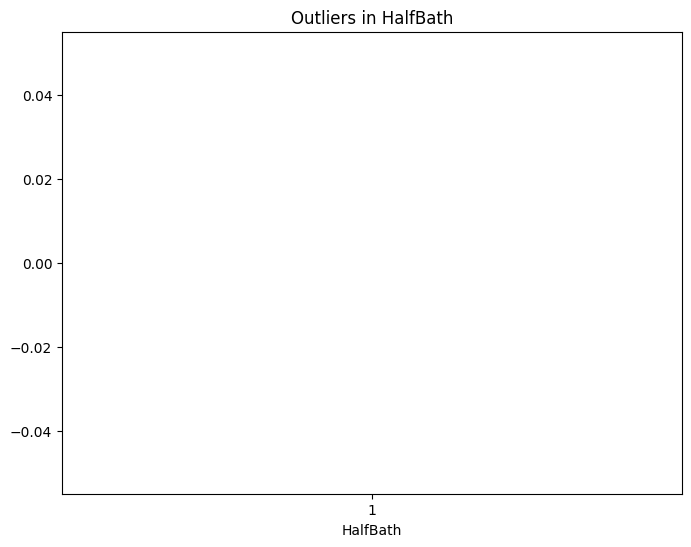

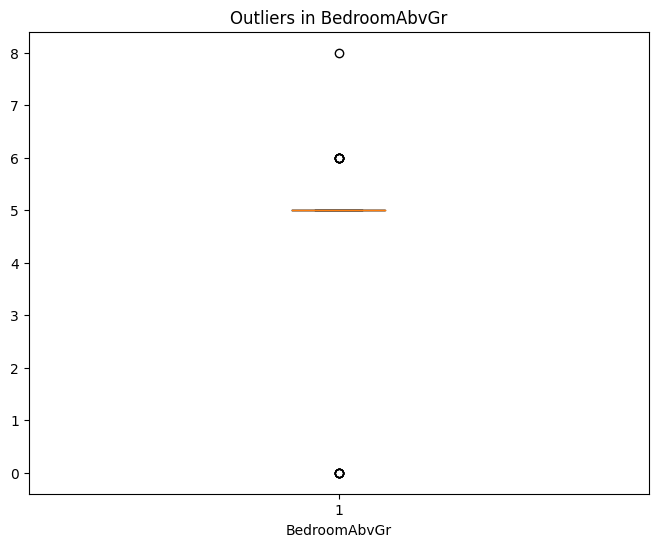

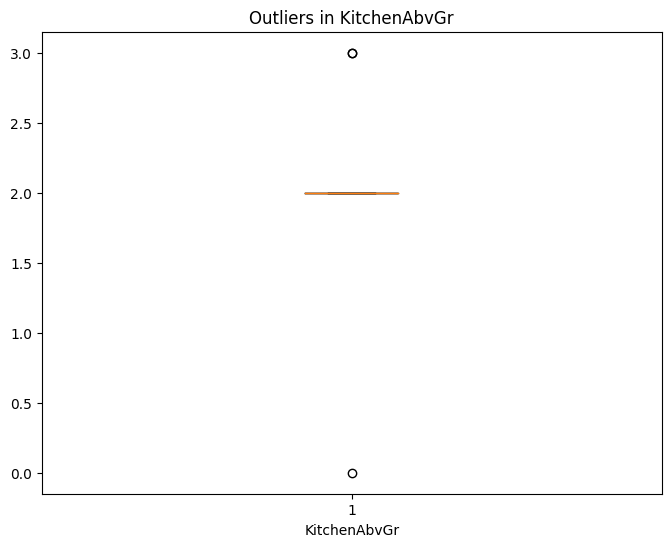

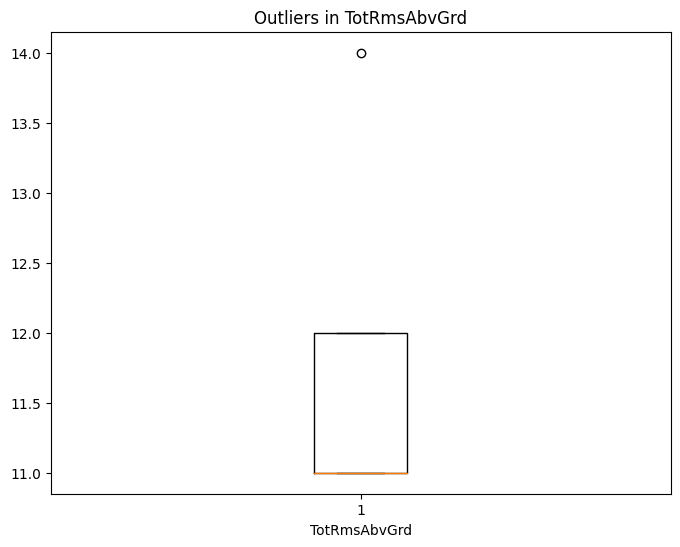

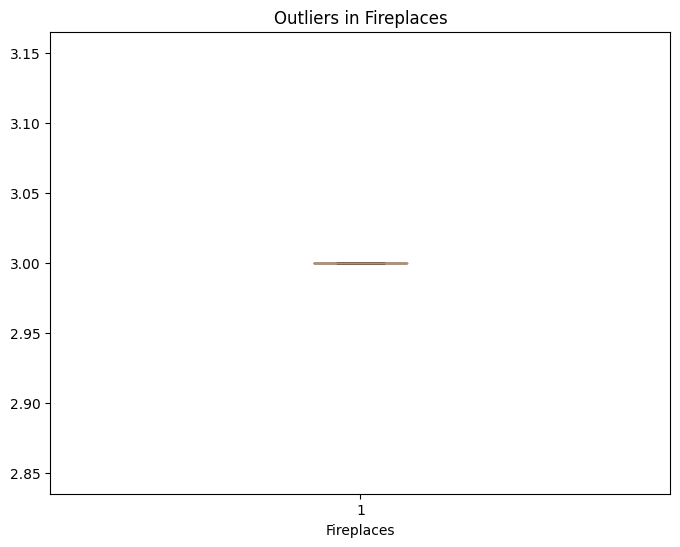

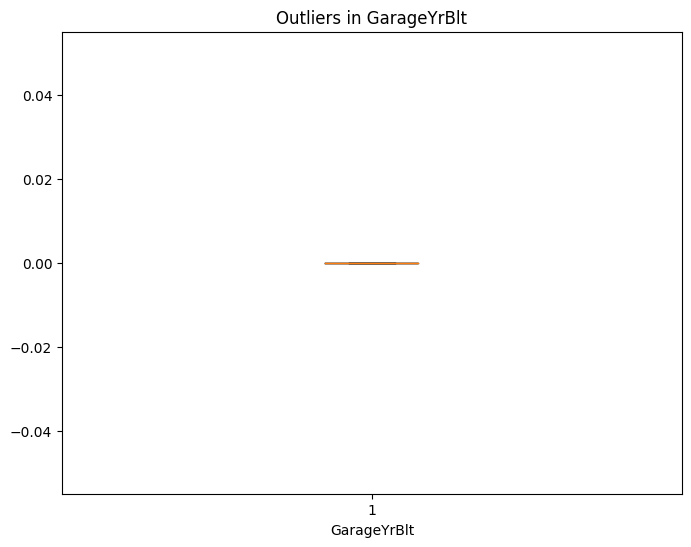

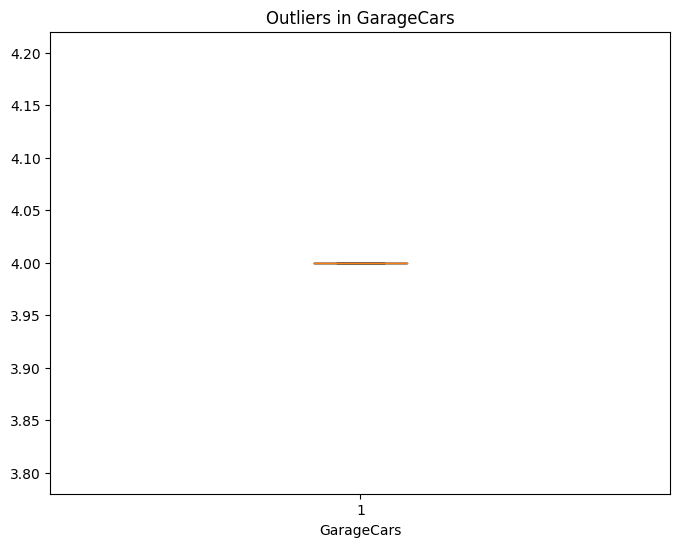

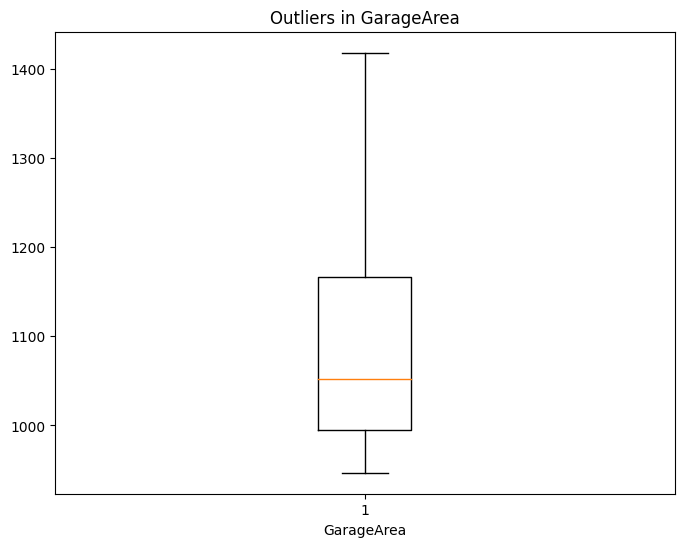

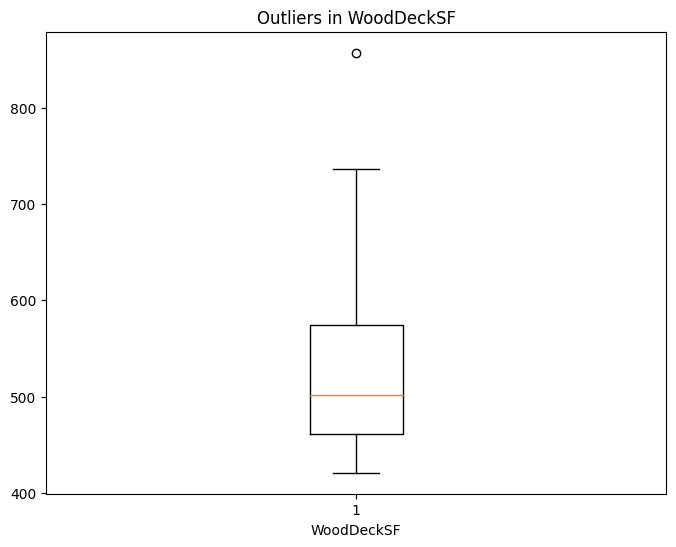

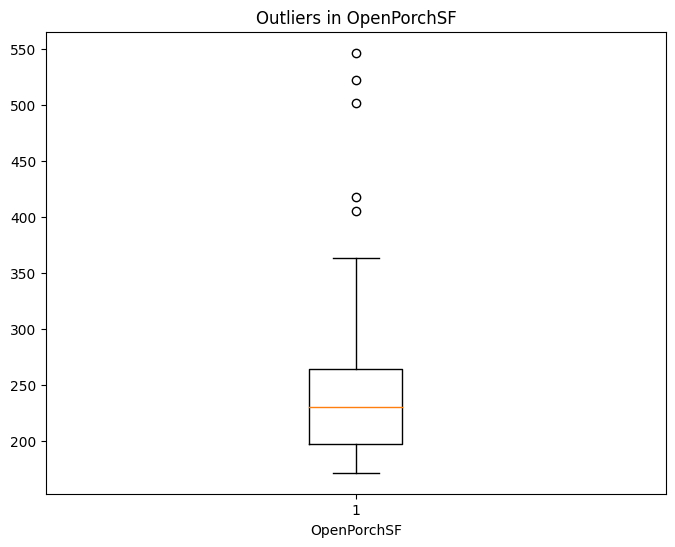

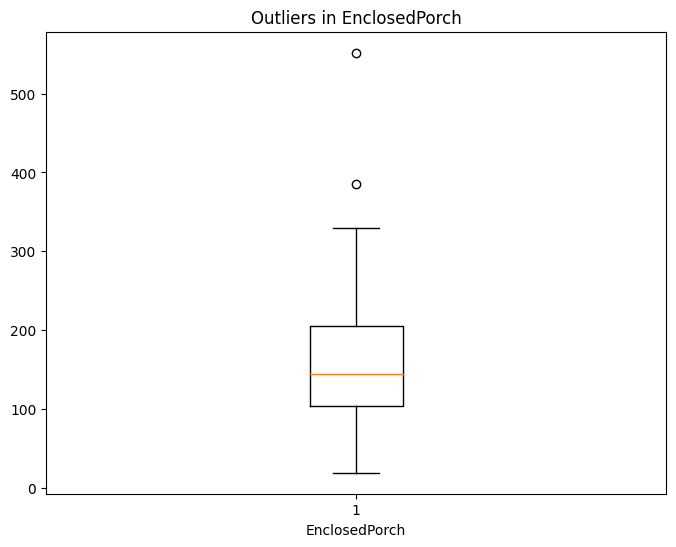

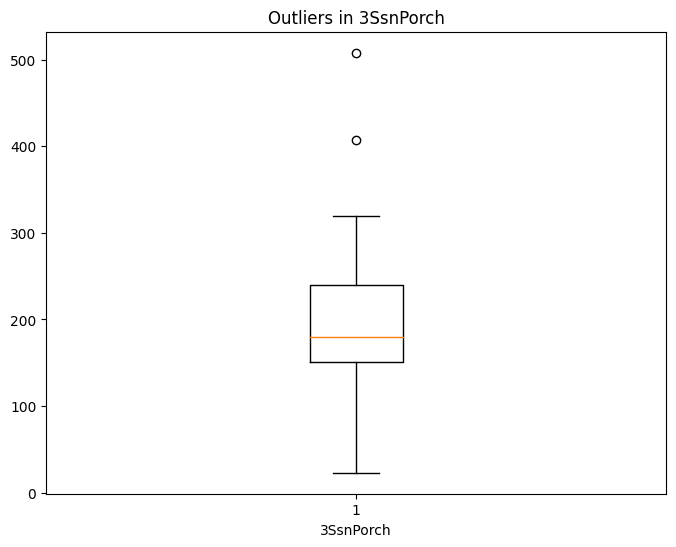

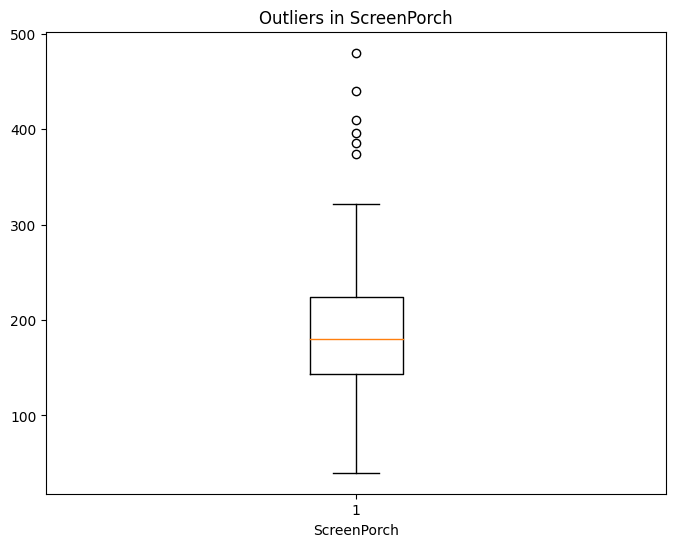

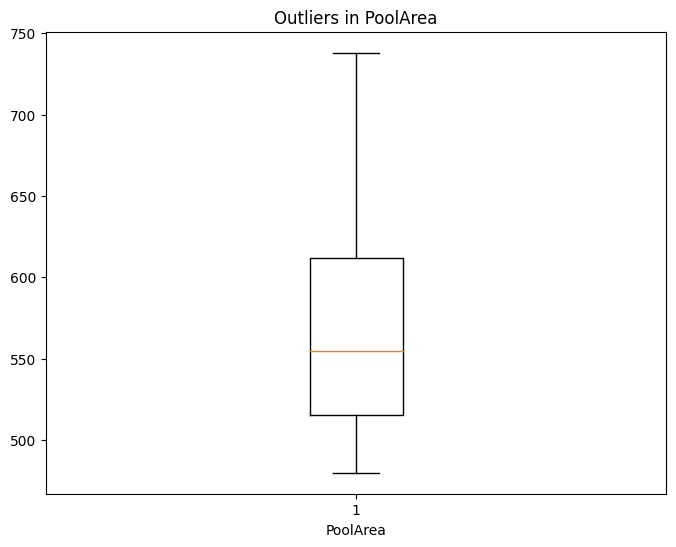

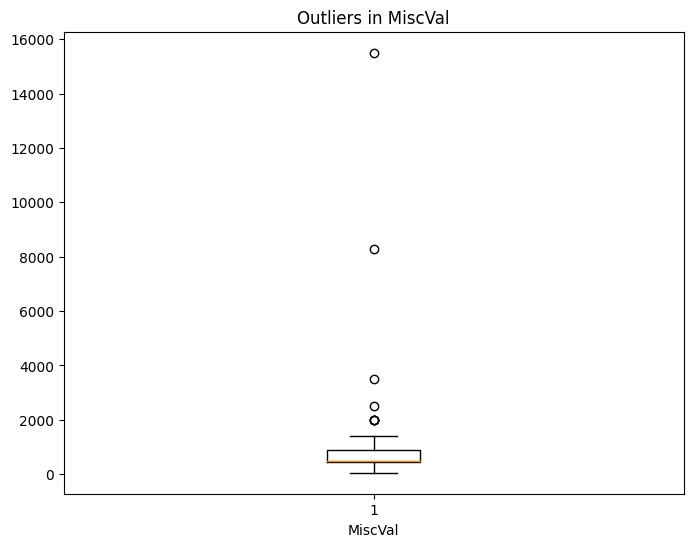

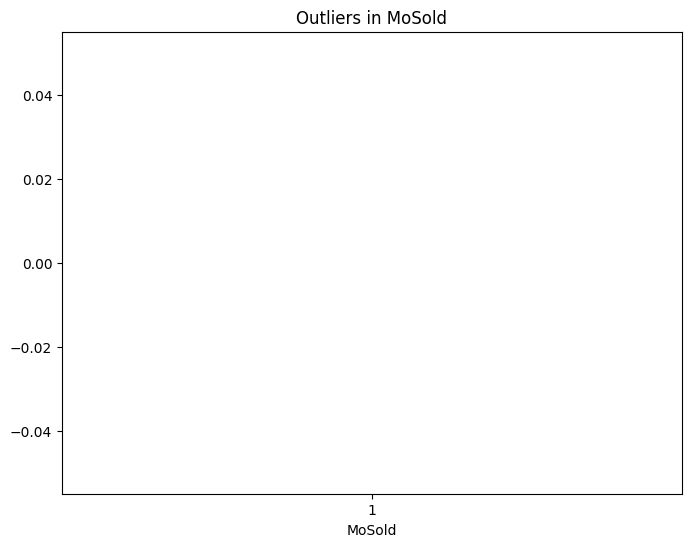

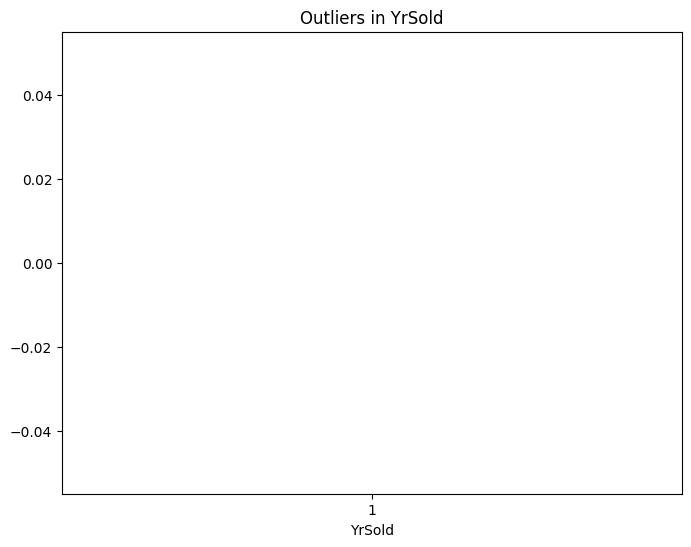

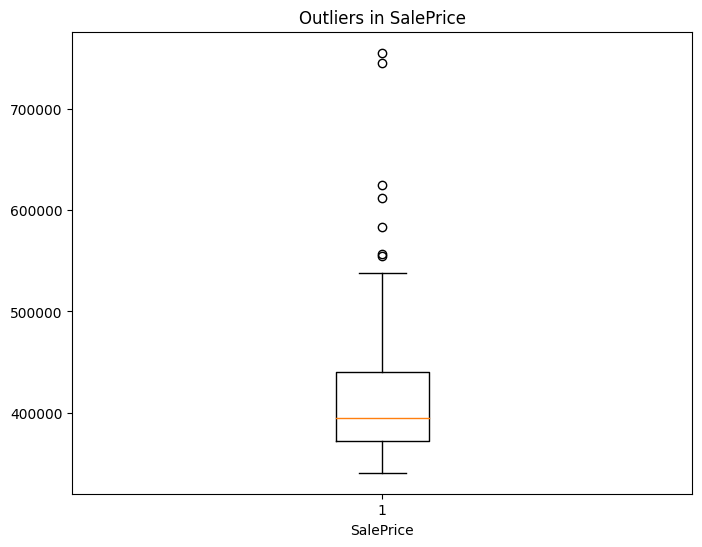

In [ ]:
import matplotlib.pyplot as plt

# Memilih kolom-kolom numerik dalam DataFrame dfnew
numerical_columns = dfnew.select_dtypes(include=['int', 'float'])

# Menggambar plot untuk setiap kolom numerik dengan outlier
for column in numerical_columns.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(dfnew[column][outliers[column]])
    plt.title(f'Outliers in {column}')
    plt.xlabel(column)
    plt.show()

Handling outlier Lot Area

In [ ]:
#Handling Outliers

num = list(dfnew.select_dtypes(include=['int','float']).columns) #numerical type columns
for cols in num:
   Q1 = dfnew[cols].quantile(0.25)
   Q3 = dfnew[cols].quantile(0.75)
   IQR=Q3-Q1
   lr= Q1-(1.5 * IQR)
   ur= Q3+(1.5 * IQR)
   dfnew[cols] = dfnew[cols].mask(dfnew[cols]<lr, lr, )
   dfnew[cols] = dfnew[cols].mask(dfnew[cols]>ur, ur, )

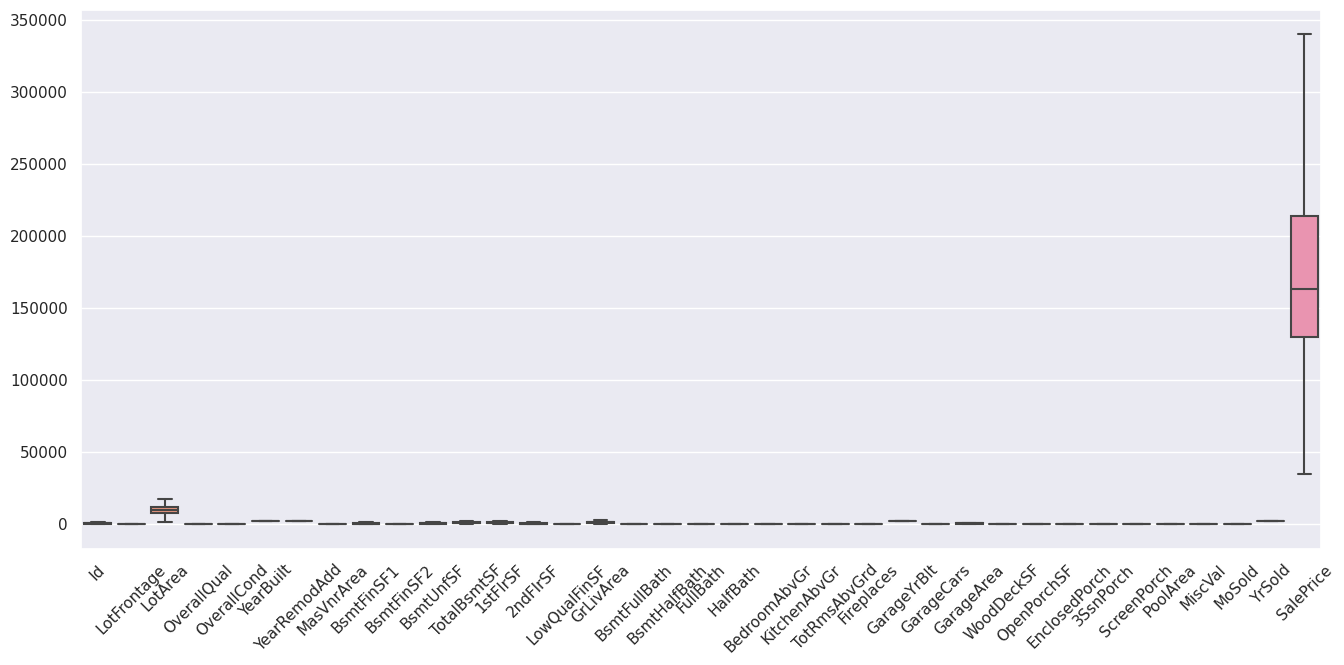

In [ ]:
import seaborn as sns
sns.set(style="darkgrid", palette="muted")
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=dfnew)
plt.xticks(rotation=45)
plt.show()

## Feature Engenering

In [ ]:
dfnew['LotAreaM2'] = dfnew["LotArea"] / 10.764

In [ ]:
dfnew ['GarageCar_m2'] = dfnew ['GarageCars'] / 10.764

In [ ]:
import datetime

now = datetime.datetime.now()
nowyear= now.year
dfnew ['BuildingAge'] = nowyear - dfnew['YearBuilt']

In [ ]:
dfnew ['RemoveAddAge'] = nowyear - dfnew['YearRemodAdd']

In [ ]:
dfnew['CountBuild_m2'] = (dfnew['1stFlrSF'] + dfnew['2ndFlrSF'] + dfnew['TotalBsmtSF']) / 10.764

In [ ]:
TestOtwEncoding = ['MSSubClass','MSZoning','Street','LotShape','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','BsmtQual','BsmtCond','Heating','HeatingQC'
                       ,'CentralAir','Electrical','KitchenQual','Functional','GarageCond','SaleType','SaleCondition']


In [ ]:
from sklearn.preprocessing import OneHotEncoder
dfnew= pd.get_dummies(dfnew, columns=TestOtwEncoding, prefix=TestOtwEncoding, dtype=int)

In [ ]:
df_final= dfnew.copy()

In [ ]:
objec2= df_final.select_dtypes(include=['object']).columns
df_final = df_final.drop(columns=objec2)

categorical2 = df_final.select_dtypes(include=['category']).columns
df_final = df_final.drop(columns=categorical2)

In [ ]:
df_final= df_final.loc[ : ,~df_final.columns.duplicated()]

# Modeling

## Cross Validation K - fold

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [ ]:
X1= df_final.drop("SalePrice", axis=1)
y1= df_final["SalePrice"]
# scaler = StandardScaler()
# scaler.fit(X)

In [ ]:
## define model
all_model = [
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    XGBRegressor(),
    GradientBoostingRegressor()
]

model_name = ['DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor','GradientBoostingRegressor']

## define k-float
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_hasil = []


for idx, model_type in enumerate(all_model):
    num = 1
    MAETemp = []
    nfold = 1

    ## spliting train, test
    for train_index, test_index in kf.split(X1, y1):
        X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
        y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]

        ## uji model
        model = model_type
        model.fit(X_train, y_train)

        ## predict
        y_pred = model.predict(X_test)

        ## show MAE / Float
        MAETemp.append(mean_absolute_error(y_test, y_pred))

        print("{} MAE/Plot: {}, {} of KFold {}".format(model_name[idx], MAETemp, nfold, kf.n_splits))
        nfold += 1

    ## rata rata MAE/model
    print('--------------')
    print('MAE / MODEL')
    print("{} MAE Model : {}".format(model_name[idx], np.mean(MAETemp)))
    print('--------------')
    kf_hasil.append((model_name[idx], y_pred))

DecisionTreeRegressor MAE/Plot: [21847.003424657534], 1 of KFold 5
DecisionTreeRegressor MAE/Plot: [21847.003424657534, 22313.58219178082], 2 of KFold 5
DecisionTreeRegressor MAE/Plot: [21847.003424657534, 22313.58219178082, 23681.409246575342], 3 of KFold 5
DecisionTreeRegressor MAE/Plot: [21847.003424657534, 22313.58219178082, 23681.409246575342, 22679.532534246577], 4 of KFold 5
DecisionTreeRegressor MAE/Plot: [21847.003424657534, 22313.58219178082, 23681.409246575342, 22679.532534246577, 22274.321917808218], 5 of KFold 5
--------------
MAE / MODEL
DecisionTreeRegressor MAE Model : 22559.169863013703
--------------
RandomForestRegressor MAE/Plot: [13832.025702054794], 1 of KFold 5
RandomForestRegressor MAE/Plot: [13832.025702054794, 14890.485410958901], 2 of KFold 5
RandomForestRegressor MAE/Plot: [13832.025702054794, 14890.485410958901, 17740.463818493154], 3 of KFold 5
RandomForestRegressor MAE/Plot: [13832.025702054794, 14890.485410958901, 17740.463818493154, 15907.14162671233], 

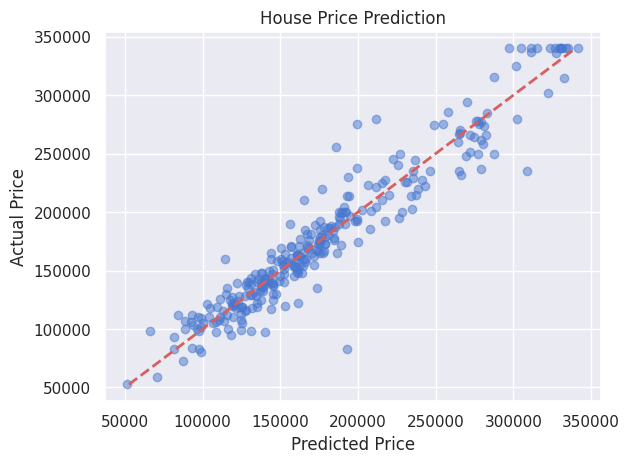

In [ ]:
plt.scatter(y_pred, y_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('House Price Prediction')
plt.show()

## Asbly model

In [ ]:
kf_hasil

[('DecisionTreeRegressor',
  array([176500. , 157000. , 204900. , 143000. , 309000. , 135000. ,
         153575. , 280000. , 224000. , 158000. , 340037.5, 237000. ,
         167500. , 160000. , 173733. ,  35311. , 206000. , 325624. ,
         102776. , 145000. , 245000. , 136905. , 191000. ,  84900. ,
         153500. , 340037.5, 214000. , 173000. , 340037.5, 207500. ,
         183900. , 102000. , 250000. , 328000. , 141500. , 188000. ,
         108000. , 191000. , 108000. , 165000. , 220000. , 164700. ,
         105000. , 191000. , 135500. ,  92000. , 107400. , 172400. ,
         154000. , 159500. , 140000. , 213250. , 245000. , 250580. ,
         100000. , 250000. , 129900. , 185000. , 287000. , 141000. ,
         227000. , 307000. , 108000. , 340037.5, 172400. , 217000. ,
         175000. , 142000. , 172500. ,  97000. , 200000. , 210000. ,
         176485. , 105900. , 228500. , 136000. , 110000. ,  94000. ,
         179500. , 201000. , 180000. ,  76500. , 179500. , 180000. ,
       

In [ ]:
kf_hasil_dict = {model_name: preds for model_name, preds in kf_hasil}
df = pd.DataFrame(kf_hasil_dict)

In [ ]:
df

,DecisionTreeRegressor,RandomForestRegressor,XGBRegressor,GradientBoostingRegressor
0,176500.0,173402.320,169188.171875,166957.289367
1,157000.0,168885.050,151900.687500,146992.472508
2,204900.0,217953.480,217005.421875,211338.340021
3,143000.0,153156.500,155987.687500,154952.867957
4,309000.0,297974.015,293442.500000,301879.239680
...,...,...,...,...
287,181000.0,160826.040,167368.468750,166628.604548
288,325624.0,313166.170,289937.968750,333687.416720
289,144000.0,143329.520,143676.625000,142867.770854
290,165000.0,152155.000,151932.828125,150861.187312


In [ ]:
Asbly = (df['DecisionTreeRegressor'] + df['GradientBoostingRegressor'] + df['XGBRegressor'] + df['GradientBoostingRegressor'])/ 4

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Membuat model-model individu
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
xgb_regressor = XGBRegressor()
gradient_boosting = GradientBoostingRegressor()

# Membuat VotingRegressor yang menggabungkan model-model individu
voting_regressor = VotingRegressor(estimators=[
    ('decision_tree', decision_tree),
    ('random_forest', random_forest),
    ('xgb_regressor', xgb_regressor),
    ('gradient_boosting', gradient_boosting)
])

# Melatih model VotingRegressor pada data Anda
X =  X_test
y =  Asbly
voting_regressor.fit(X, y)

VotingRegressor(estimators=[('decision_tree', DecisionTreeRegressor()),
                            ('random_forest', RandomForestRegressor()),
                            ('xgb_regressor',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=No...
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('gradient_boosting', GradientBoostingRegressor())])

In [ ]:
maeAsbly = mean_absolute_error(y_test, Asbly)
print(maeAsbly)

13667.515283056242


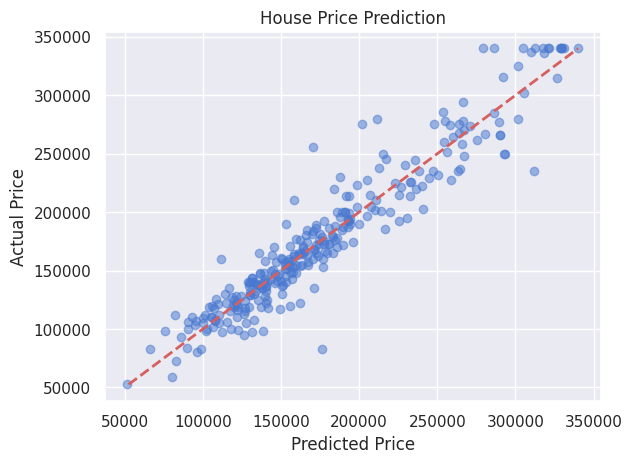

In [ ]:
plt.scatter(Asbly, y_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('House Price Prediction')
plt.show()

## Hyper Parameter Tuning

In [ ]:
#define pipeline
class my_regresor(BaseEstimator,):
    def __init__(self, estimator=None):
        self.estimator = estimator
    def fit(self, X, y=None):
        self.estimator.fit(X,y)
        return self
    def predict(self, X, y=None):
        return self.estimator.predict(X,y)
    def predict_proba(self, X):
        return self.estimator.predict_proba(X)
    def score(self, X, y):
        return self.estimator.score(X, y)

pipe = Pipeline([('scaler', StandardScaler()), ('clf', my_regresor())])

In [ ]:
#define pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('clf', my_regresor())])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


# Definisi ruang parameter
parameters = [
    {
        'clf': [DecisionTreeRegressor()],
        'clf__splitter': ['best', 'random'],
        'clf__max_features': ['auto', 'sqrt', 'log2'],
        'clf__random_state': list(range(1,100)),
        'clf__max_depth': list(range(1,100))
    },
    {
        'clf': [RandomForestRegressor()],
        'clf__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
        'clf__max_features': ['auto', 'sqrt', 'log2'],
        'clf__random_state': list(range(1,100)),
        'clf__max_depth': list(range(1,100)),
        'clf__n_estimators': list(range(1,100))
    },
    {
        'clf': [XGBRegressor()],
        'clf__tree_method': ['auto', 'exact', 'approx', 'hist'],
        'clf__max_depth': list(range(1,100)),
        'clf__eta': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'clf__subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    },
    {
        'clf': [GradientBoostingRegressor()],
        'clf__max_depth': list(range(1,100)),
        'clf__max_leaf_nodes': list(range(1,100)),
        'clf__learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'clf__n_estimators': list(range(1,100)),
        'clf__random_state': list(range(1,100)),
    }
]

# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(pipe, parameters, cv=5)

# Melakukan pencarian
random_search.fit(X_train, y_train)
best_score = random_search.best_score_

In [ ]:
random_search.best_params_

{'clf__random_state': 95,
 'clf__n_estimators': 77,
 'clf__max_leaf_nodes': 39,
 'clf__max_depth': 22,
 'clf__learning_rate': 0.4,
 'clf': GradientBoostingRegressor(learning_rate=0.4, max_depth=22, max_leaf_nodes=39,
                           n_estimators=77, random_state=95)}

In [ ]:
best_score

0.8781084697816475

In [ ]:
hyper_pred = random_search.predict(X_test,)

In [ ]:
maehyper = mean_absolute_error(y_test, hyper_pred)
print(maehyper)

13931.167755457254


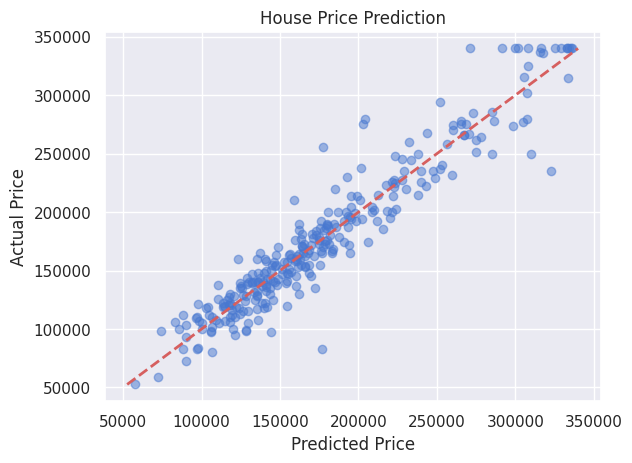

In [ ]:
plt.scatter(hyper_pred, y_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('House Price Prediction')
plt.show()

# Learning Curve

In [ ]:
X_train

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450.0,7,5.0,2003,2003,196.0,706.0,0,...,0,0,0,1,0,0,0,0,1,0
2,3,68.0,11250.0,7,5.0,2001,2002,162.0,486.0,0,...,0,0,0,1,0,0,0,0,1,0
3,4,60.0,9550.0,7,5.0,1915,1970,0.0,216.0,0,...,0,0,0,1,1,0,0,0,0,0
4,5,84.0,14260.0,8,5.0,2000,2000,350.0,655.0,0,...,0,0,0,1,0,0,0,0,1,0
5,6,85.0,14115.0,5,5.0,1993,1995,0.0,732.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,62.0,7500.0,7,5.0,2004,2005,0.0,410.0,0,...,0,0,0,1,0,0,0,0,1,0
1455,1456,62.0,7917.0,6,5.0,1999,2000,0.0,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,85.0,13175.0,6,6.0,1978,1988,119.0,790.0,0,...,0,0,0,1,0,0,0,0,1,0
1458,1459,68.0,9717.0,5,6.0,1950,1996,0.0,49.0,0,...,0,0,0,1,0,0,0,0,1,0


BIAS

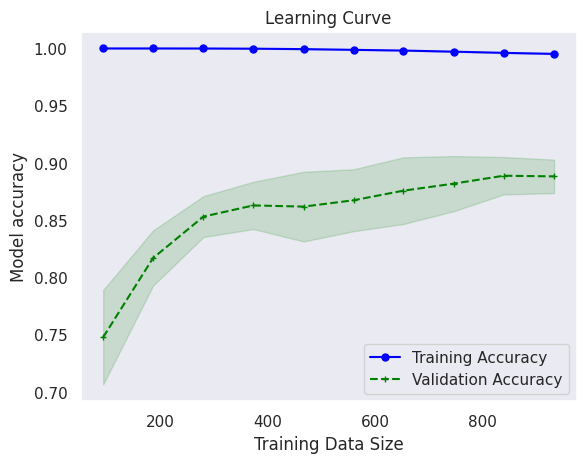

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from sklearn import datasets
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

#learning curve
pipeline = make_pipeline(StandardScaler(),GradientBoostingRegressor(learning_rate=0.2, max_depth=41, max_leaf_nodes=14,
                           n_estimators=85, random_state=1))


train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X_train.to_numpy(), y=y_train.to_numpy(),
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)


# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

GOOD CURVE

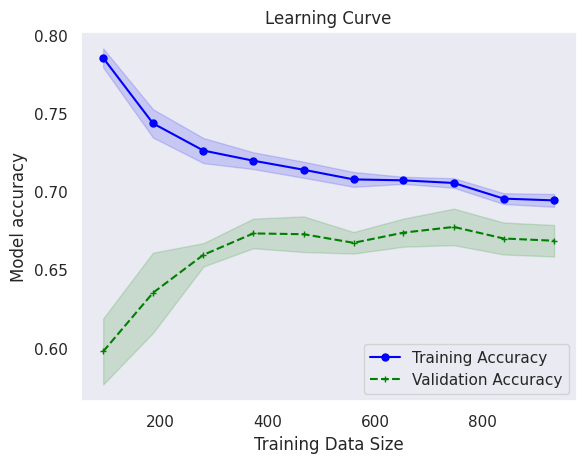

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from sklearn import datasets
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

#learning curve
pipeline = make_pipeline(StandardScaler(),GradientBoostingRegressor(learning_rate=0.2, max_depth=6, max_leaf_nodes=8,
                           n_estimators=4, random_state=4))


train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X_train.to_numpy(), y=y_train.to_numpy(),
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)


# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [ ]:
X

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1,2,80.0,9600.0,6,7.5,1976,1976,0.000,978.0,0,...,0,0,0,1,0,0,0,0,1,0
8,9,51.0,6120.0,7,5.0,1931,1950,0.000,0.0,0,...,0,0,0,1,1,0,0,0,0,0
13,14,91.0,10652.0,7,5.0,2006,2007,306.000,0.0,0,...,0,1,0,0,0,0,0,0,0,1
14,15,69.0,10920.0,6,5.0,1960,1960,212.000,733.0,0,...,0,0,0,1,0,0,0,0,1,0
20,21,101.0,14215.0,8,5.0,2005,2006,380.000,0.0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,1435,80.0,17400.0,5,5.0,1977,1977,0.000,936.0,0,...,0,0,0,1,0,0,0,0,1,0
1437,1438,96.0,12444.0,8,5.0,2008,2008,410.625,1336.0,0,...,0,1,0,0,0,0,0,0,0,1
1441,1442,69.0,4426.0,6,5.0,2004,2004,147.000,697.0,0,...,0,0,0,1,0,0,0,0,1,0
1446,1447,69.0,17673.5,5,7.0,1962,1962,189.000,593.0,0,...,0,0,0,1,0,0,0,0,1,0


# visual

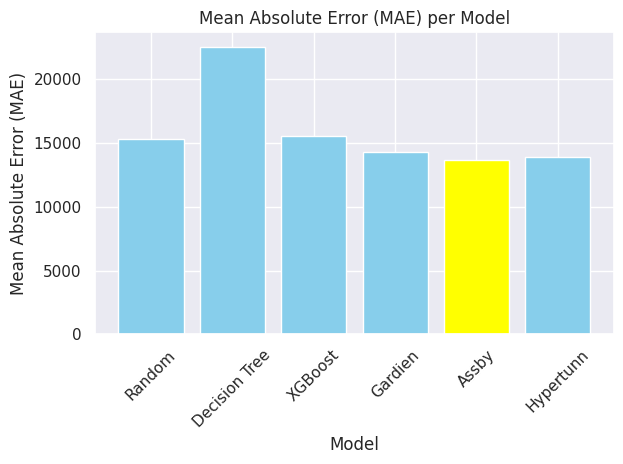

In [ ]:
hjtughimport matplotlib.pyplot as plt

# Data MAE
models = ['Random', 'Decision Tree', 'XGBoost', 'Gardien', 'Assby', 'Hypertunn']
mae_values = [15293.61225, 22559.169863013703, 15564.815285209761, 14307.760882396487, 13667.515283056242, 13931.167755457254]

# Membuat diagram batang
plt.bar(models, mae_values, color=['skyblue','skyblue','skyblue','skyblue','yellow','skyblue'])
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Mean Absolute Error (MAE) per Model')
plt.xticks(rotation=45)  # Untuk memutar label model agar lebih mudah dibaca
plt.tight_layout()  # Untuk mengatur tata letak plot
plt.show()
